# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

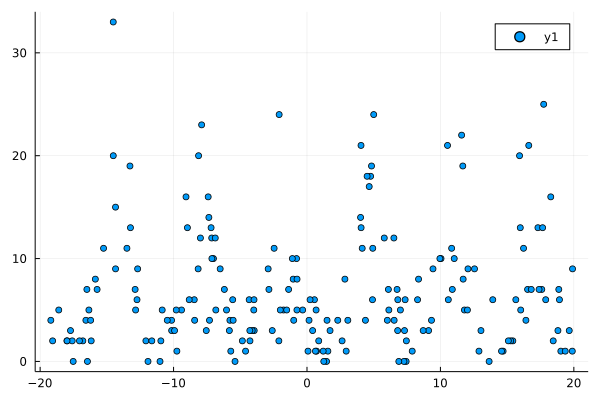

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -622.5374802776763
[ Info: Training ended after 20 iterations. Total number of iterations 20
  4.131750 seconds (7.09 M allocations: 457.894 MiB, 10.05% gc time, 97.68% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.4662341136774526, 0.5080767027062514, 0.3350368498282362, 0.15653345144734118, 0.44284994960734264, 0.5112329602043986, 0.5382122181264474, 0.5280772132457368, 0.5180205549129512, 0.24934836803226346  …  0.3392074076248184, 0.3192332556982073, 0.2937074051202896, 0.3981459968430027, 0.19678973556276697, 0.2600656967654023, 0.4093277408085053, 0.44294877838233815, 0.5380384016994341, 0.23104279449886606], θ = [12.769519979279627, 5.384661406491466, 3.962998719218774, 8.482686327631345, 3.443899443095249, 14.192232333390841, 2.441349931618613, 4.398261615338121, 2.4455552636860545, 6.963955566571132  …  4.952602923470987, 5.453762457970009, 2.9786184172909893, 7.895968640357482, 2.99035579660813, 2.4860042004260006, 9.36954225766163, 8.85567826943428, 11.230379017171643, 7.466814154302219]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -718.7214412932777
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.766573 seconds (4.68 M allocations: 333.959 MiB, 4.94% gc time, 96.58% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.90227709379096) infered by Analytic Variational Inference , (local_vars = (c = [0.3802499309600868, 0.7072550143005796, 0.5271651615481295, 0.2341607942270376, 0.6812161190779534, 0.44584107639414533, 0.7591602056472978, 0.47082751338614476, 0.7427215153848176, 0.19925708704313977  …  0.2033316351900526, 0.55518451125894, 0.4683486402908247, 0.27507602573323403, 0.3591479329358092, 0.48359079902776964, 0.3013702654902793, 0.3449021519135051, 0.4857949729323428, 0.13895682377264545], θ = [13.404879256217544, 7.573115245214387, 5.934300721391257, 10.026077549637415, 5.689373861792048, 14.694343463594613, 4.7667809787951505, 4.796616316659969, 4.7724048316420555, 8.314243187465655  …  5.91052358563008, 7.490772855611834, 4.874868272115256, 8.714562240840444, 4.752249162174012, 4.470541707075194, 10.126797022327276, 9.536468896607763, 11.62855811583097, 8.748173036367785], γ = [6.132017992451078, 9.772386445372977, 9.142196835

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

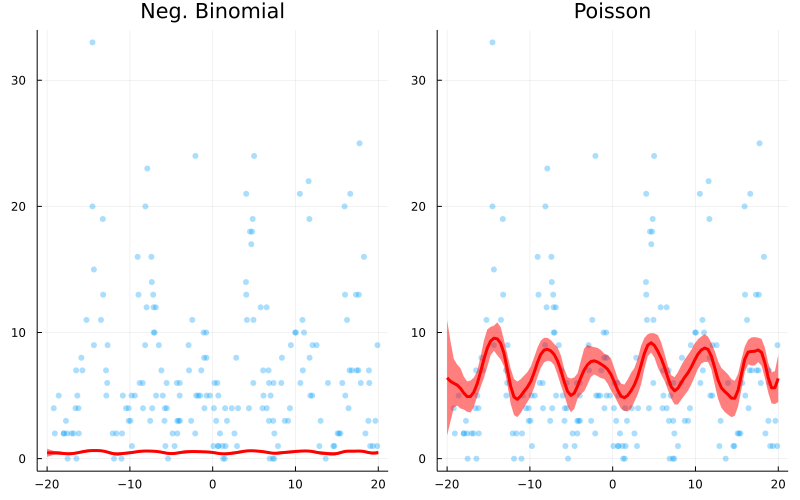

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*